#  Telecom Churn Prediction


**Team AID:**
    1. Shukiraliyev Daniyar
    2. Daniyarova Altynshash
    3. Kerimbek Imangali

## Content
+ Introduction
+ Research questions
+ Data description and objectives
+ Data acquisiton, manipulation and validation
+ Model building
+ Evaluating models
+ Conclusion

## 1. Introduction

The company is constantly working to improve the quality of its products and services for its subscriber base and to minimize churn. In our work, we use a personal approach to subscribers (абонентам).
To reduce churn, the company uses different channels of communication with clients. Each proposal must be addressed to an individual request. In this task, we have to use the available data to try to determine the subscribers(абонента) who will go to churn.

## 2. Steps
1. Build the best model
2. Evaluate the model

## 3. Data description and objectives

The dataset contains anonymized data about subscribers: the subscriber's service language, tariff plan, information on the volumes of consumption of various operator services, and others.


+ **3 categorical features (C1, C2, C3)**
+ **23 numerical signs (N1, …, N23)**
+ **target variable - TARGET**

## 4. Data acquisiton, manipulation and validation

In [1]:
# import all modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix,  classification_report, accuracy_score, f1_score, confusion_matrix

In [2]:
# read file
df = pd.read_csv('train.csv', sep=';')
pd.set_option("display.max_columns", None)
df.head()

,C1,C2,C3,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
0,3139363536333839,323531,33,"83,74","3172,92","181,48","24,83","9,6",0,0,"24,83","9,6","24,83","9,6",0,0,36,7,0,0,36,7,36,7,0,0,0
1,3437333830323633,343835,31,"1,46","1273,88","92,11","211,78","28,98","5,75","13,85","206,03","15,13","211,78","28,98",0,0,57,18,5,6,52,12,57,18,0,0,0
2,3134323931353339,323531,33,0,"31,95","763,19","48,13","77,22","9,33","4,9","38,8","72,32","48,13","77,22",0,0,64,24,18,6,46,18,64,24,0,0,0
3,3431333831343031,343433,31,"117,49","529,19","1506,4","127,67","49,3","6,25","0,2","120,07","49,1","127,67","49,3",0,0,148,57,4,1,142,56,148,57,0,0,0
4,3233343933313234,343835,31,0,"38,24","3493,18","389,98","72,78","16,72","4,28","373,27","68,5","389,98","72,78",0,0,86,28,17,5,69,23,86,28,0,0,0


In [3]:
# check columns
df.columns

Index(['C1', 'C2', 'C3', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9',
       'N10', 'N11', 'N12', 'N13', 'N14', 'N15', 'N16', 'N17', 'N18', 'N19',
       'N20', 'N21', 'N22', 'N23', 'TARGET'],
      dtype='object')

In [4]:
# check all information about data types, missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514009 entries, 0 to 514008
Data columns (total 27 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   C1      514009 non-null  int64 
 1   C2      514009 non-null  int64 
 2   C3      514009 non-null  int64 
 3   N1      514009 non-null  object
 4   N2      514009 non-null  object
 5   N3      514009 non-null  object
 6   N4      514009 non-null  object
 7   N5      514009 non-null  object
 8   N6      514009 non-null  object
 9   N7      514009 non-null  object
 10  N8      514009 non-null  object
 11  N9      514009 non-null  object
 12  N10     514009 non-null  object
 13  N11     514009 non-null  object
 14  N12     514009 non-null  object
 15  N13     514009 non-null  object
 16  N14     514009 non-null  int64 
 17  N15     514009 non-null  int64 
 18  N16     514009 non-null  int64 
 19  N17     514009 non-null  int64 
 20  N18     514009 non-null  int64 
 21  N19     514009 non-null  int64 
 

In [5]:
# check null values
df.isnull().sum()

C1        0
C2        0
C3        0
N1        0
N2        0
N3        0
N4        0
N5        0
N6        0
N7        0
N8        0
N9        0
N10       0
N11       0
N12       0
N13       0
N14       0
N15       0
N16       0
N17       0
N18       0
N19       0
N20       0
N21       0
N22       0
N23       0
TARGET    0
dtype: int64

### 4.1 FEATURE ENGINEERING
**Working with categorical data**`

In [6]:
df['C1'].value_counts()

3534393232343231    1
3436393330303539    1
34383533383630      1
3139393936313937    1
3134353635393830    1
                   ..
3436343930313934    1
3437383035303235    1
3432383733393236    1
3334393439343137    1
3339363938303634    1
Name: C1, Length: 514009, dtype: int64

It seems to me that this column is similar to the **ID**. I guess we won't be using it for models in the future.

In [7]:
df.drop('C1', axis=1, inplace=True)
df.head(1)  

,C2,C3,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
0,323531,33,"83,74","3172,92","181,48","24,83","9,6",0,0,"24,83","9,6","24,83","9,6",0,0,36,7,0,0,36,7,36,7,0,0,0


In [8]:
df['C2'].value_counts()

343637    59659
343439    57656
343433    44158
343835    42649
343038    41280
          ...  
313433        2
3437          1
343336        1
353031        1
3330          1
Name: C2, Length: 64, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
# Instantiate LabelEncoder
le = LabelEncoder()
cols = ['C2']
# Encode labels of multiple columns at once
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [10]:
df['C3'].value_counts()

31    351968
33    161996
32        45
Name: C3, dtype: int64

In [11]:
# OneHot Encoding
# get dummy values for C3
df = pd.concat([df, pd.get_dummies(df["C3"], prefix="C3"), ],axis=1,)

In [12]:
df.drop(['C3'], axis=1, inplace=True)

In [13]:
df.head(2)

,C2,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET,C3_31,C3_32,C3_33
0,31,"83,74","3172,92","181,48","24,83","9,6",0,0,"24,83","9,6","24,83","9,6",0,0,36,7,0,0,36,7,36,7,0,0,0,0,0,1
1,58,"1,46","1273,88","92,11","211,78","28,98","5,75","13,85","206,03","15,13","211,78","28,98",0,0,57,18,5,6,52,12,57,18,0,0,0,1,0,0


In [14]:
df.drop(['C3_32'], axis=1, inplace=True)

### 4.2 FEATURE ENGINEERING 
**Object to numeric**

In [15]:
for col in df.columns[1:14]:
    df[col] = df[col].apply(str).str.replace(',', '.')

In [16]:
for col in  df.columns[1:14]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [17]:
df['Target'] = df['TARGET']
df.drop(['TARGET'], axis=1, inplace=True)
df['TARGET'] = df['Target']
df.drop(['Target'], axis=1, inplace=True)

## EDA

In [18]:
df.head()

,C2,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,C3_31,C3_33,TARGET
0,31,83.74,3172.92,181.48,24.83,9.60,0.00,0.00,24.83,9.60,24.83,9.60,0.0,0.0,36,7,0,0,36,7,36,7,0,0,0,1,0
1,58,1.46,1273.88,92.11,211.78,28.98,5.75,13.85,206.03,15.13,211.78,28.98,0.0,0.0,57,18,5,6,52,12,57,18,0,0,1,0,0
2,31,0.00,31.95,763.19,48.13,77.22,9.33,4.90,38.80,72.32,48.13,77.22,0.0,0.0,64,24,18,6,46,18,64,24,0,0,0,1,0
3,49,117.49,529.19,1506.40,127.67,49.30,6.25,0.20,120.07,49.10,127.67,49.30,0.0,0.0,148,57,4,1,142,56,148,57,0,0,1,0,0
4,58,0.00,38.24,3493.18,389.98,72.78,16.72,4.28,373.27,68.50,389.98,72.78,0.0,0.0,86,28,17,5,69,23,86,28,0,0,1,0,0


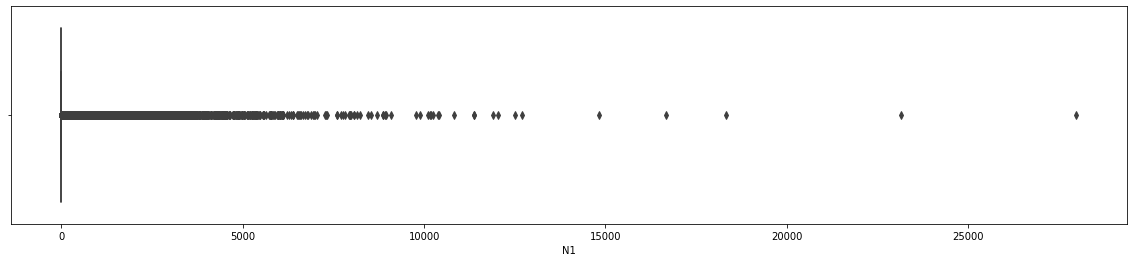

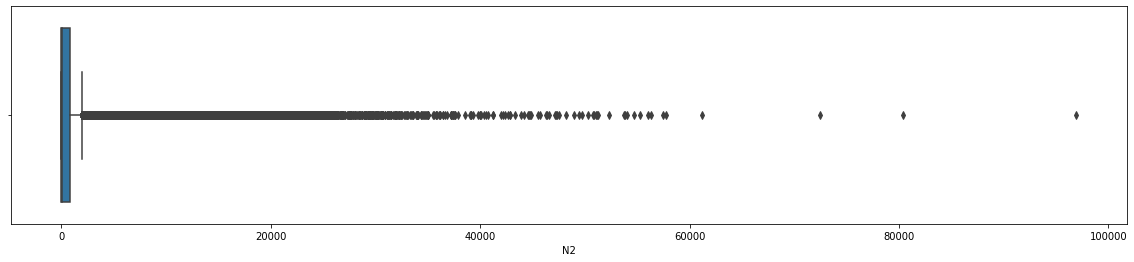

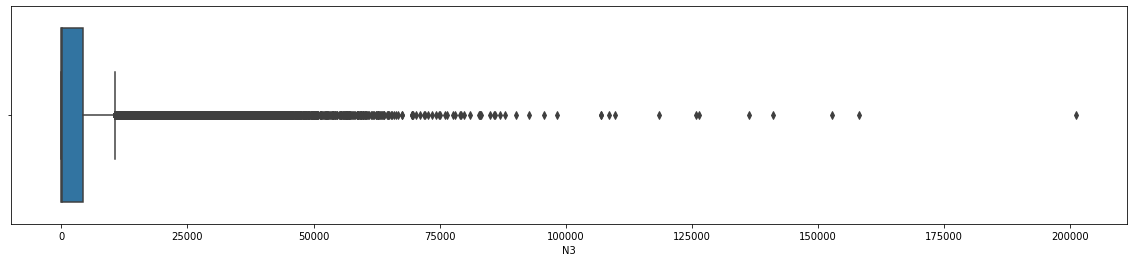

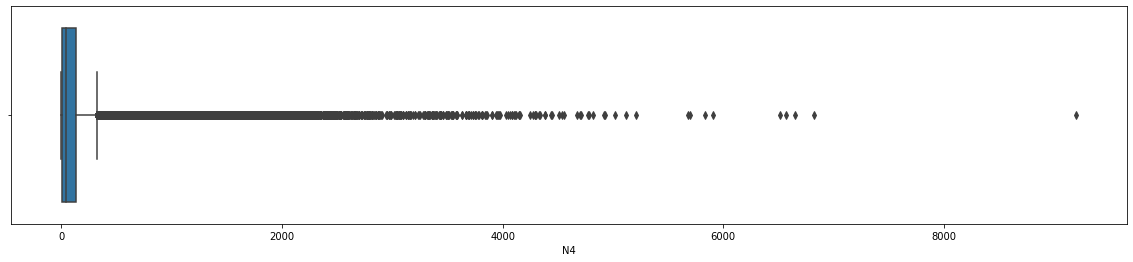

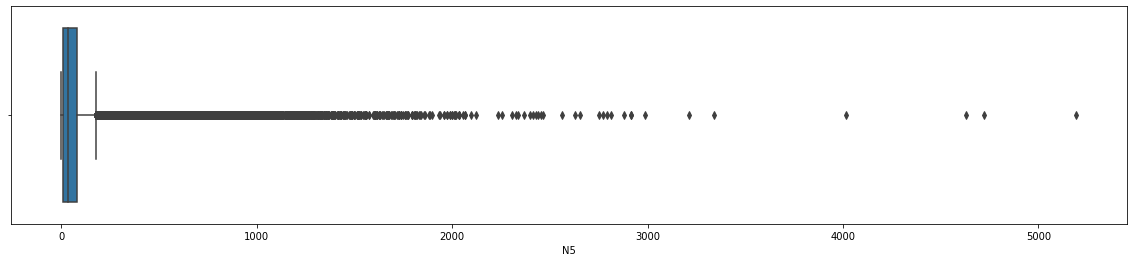

In [19]:
# N1
cols = df.columns

for col in cols[1:6]:
    plt.figure( figsize=(20,4))
    sns.boxplot(x=df[col])

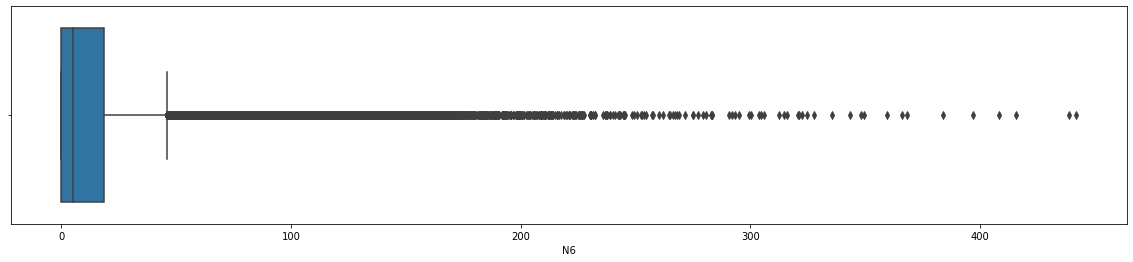

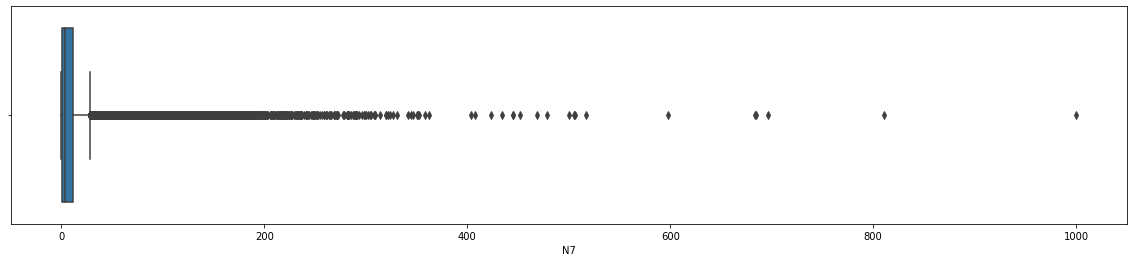

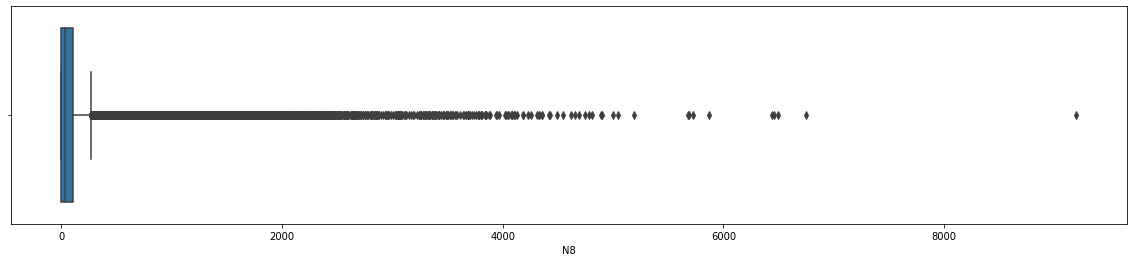

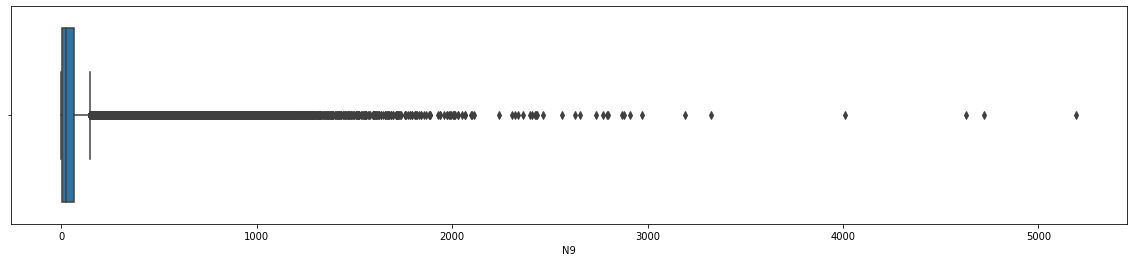

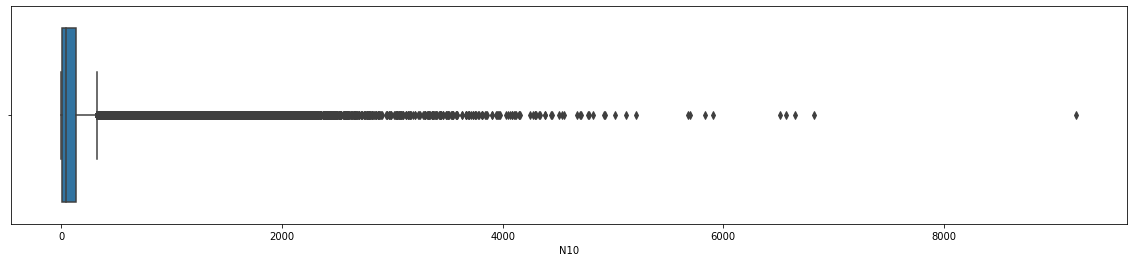

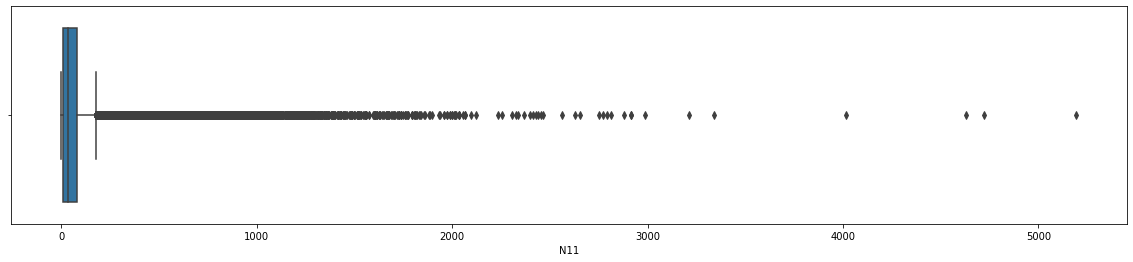

In [20]:
cols = df.columns

for col in cols[6:12]:
    plt.figure(figsize=(20,4))
    sns.boxplot(x=df[col])

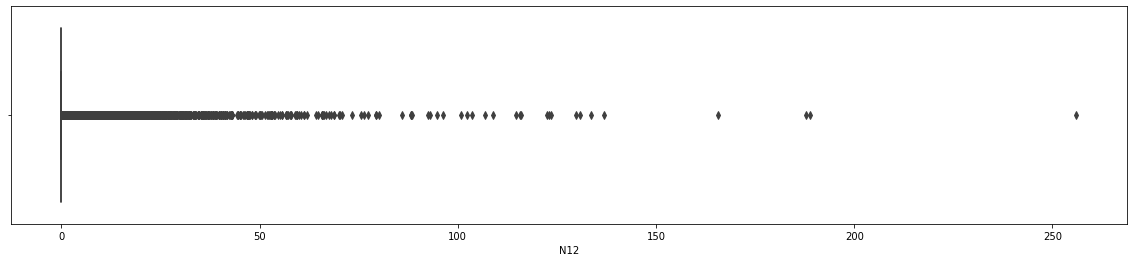

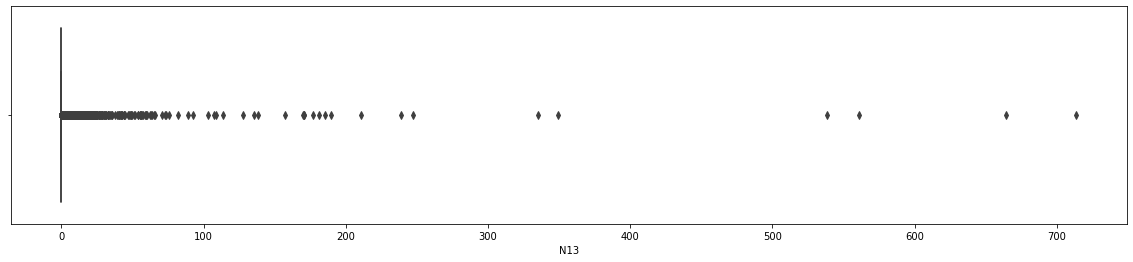

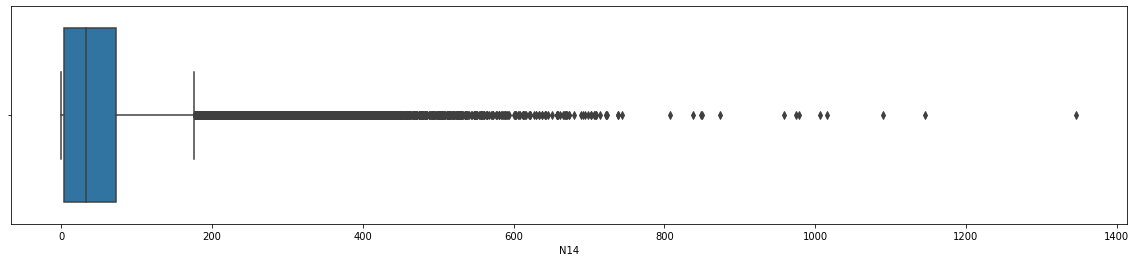

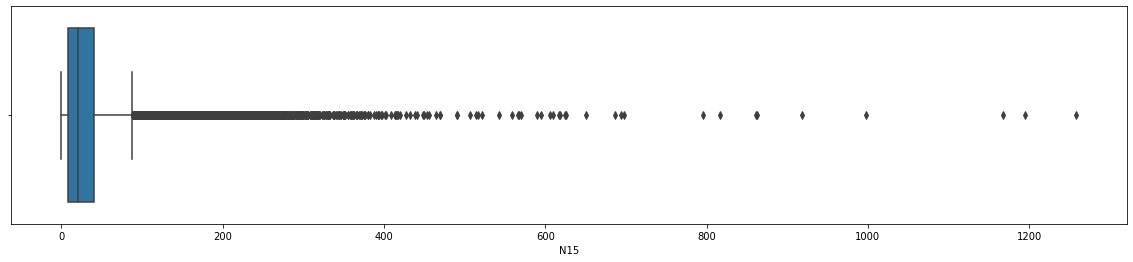

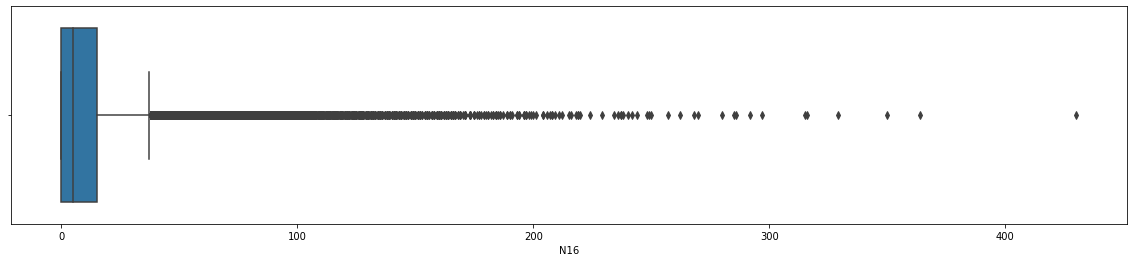

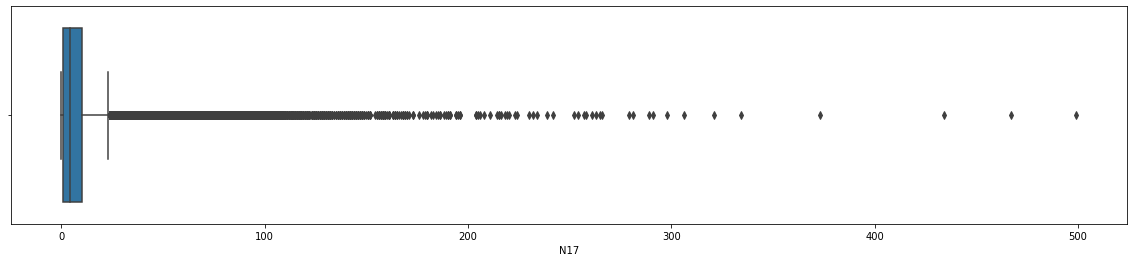

In [21]:
## N12 N13
cols = df.columns

for col in cols[12:18]:
    plt.figure(figsize=(20,4))
    sns.boxplot(x=df[col])

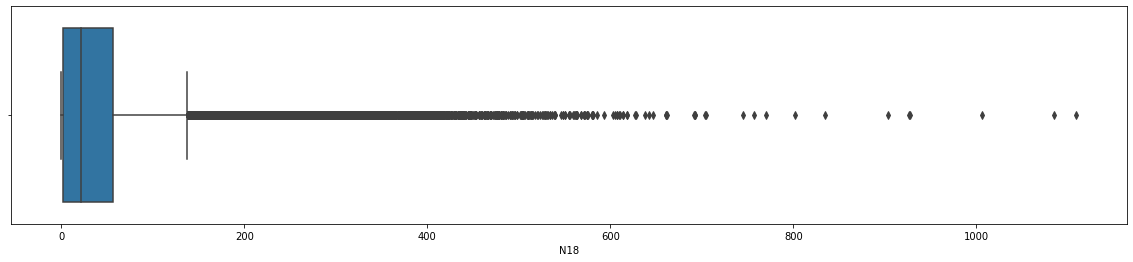

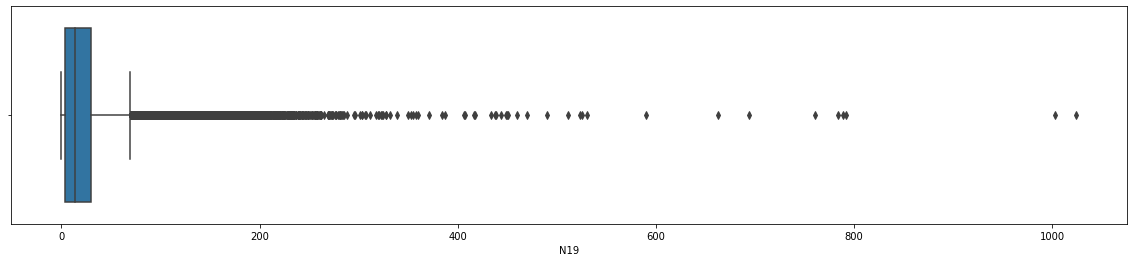

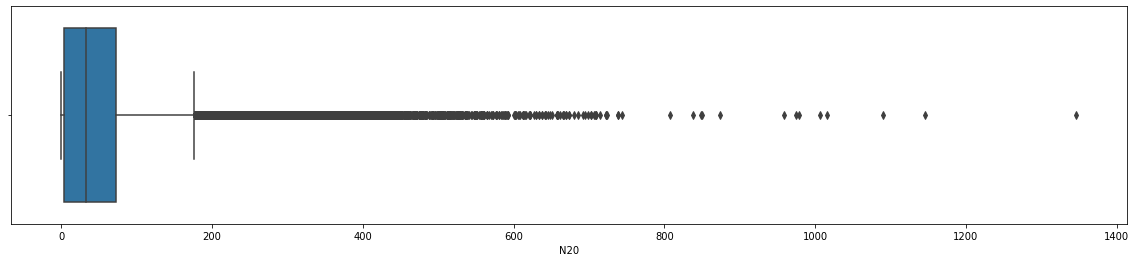

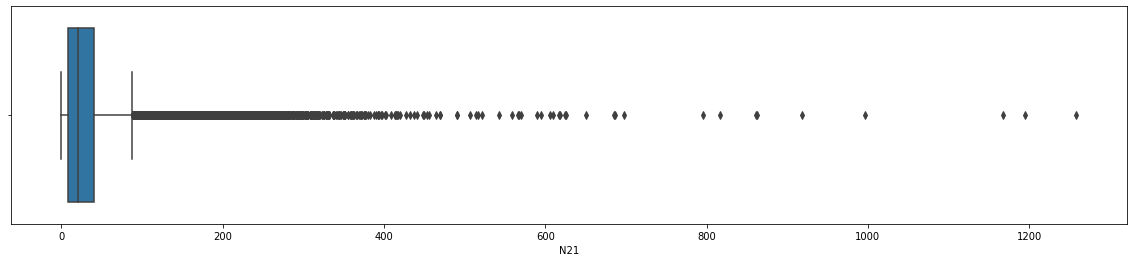

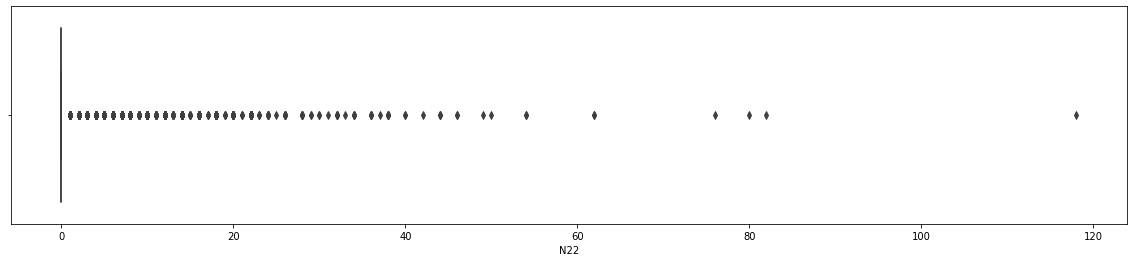

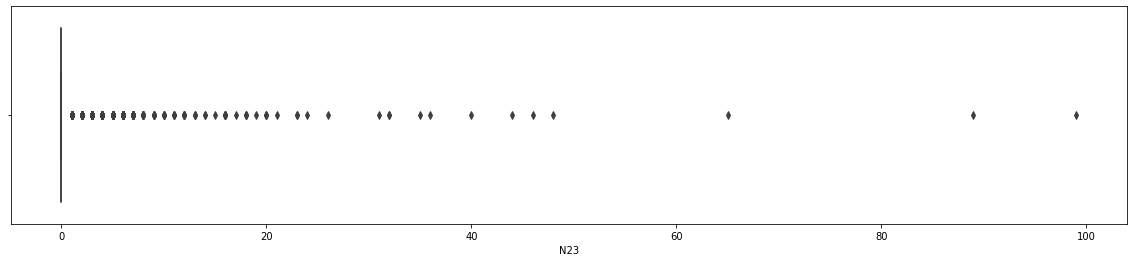

In [22]:
# N22 N23
cols = df.columns

for col in cols[18:24]:
    plt.figure(figsize=(20,4))
    sns.boxplot(x=df[col])

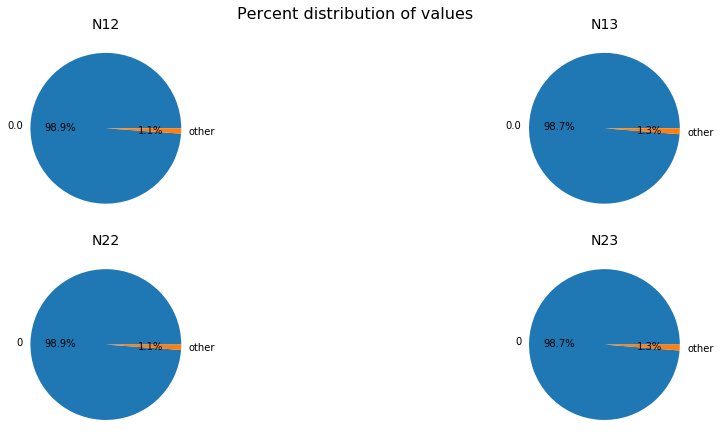

In [23]:
#Here we use subplot and loop to create a graph
plt.figure(figsize = (14,40))
plt.suptitle('Percent distribution of values', size=16)

# cols = df.columns.values.tolist()
# cols = cols[3:-1]
cols = ['N12', 'N13', 'N22', 'N23']

n = 1 
while n != len(cols)+1:
    
    uniq = df.groupby(cols[n-1], as_index=False).count().iloc[:, [0,-1]]
    uniq['percent'] = [(i/len(df[cols[n-1]]))*100 for i in uniq['TARGET']]
    
    uniq[cols[n-1]] = [str(i) for i in uniq[cols[n-1]]]
    
    for i in range(len(uniq)):
        if uniq['percent'][i] < 1:
            uniq.at[i, cols[n-1]] = 'other'
    
    uniq = uniq.groupby(cols[n-1], as_index=False).sum()
    
    plt.subplot(13,2,n)
    plt.pie(uniq['TARGET'], 
            labels = uniq[cols[n-1]],
            autopct='%1.1f%%',
            shadow=False, 
            startangle=0)
    plt.title(cols[n-1], size = 14)
    n+=1

plt.tight_layout(rect=[0, 0, 1, 0.98])

In [24]:
df = df.drop(['N12', 'N13', 'N22', 'N3'], axis = 1)

In [25]:
df.head()

,C2,N1,N2,N4,N5,N6,N7,N8,N9,N10,N11,N14,N15,N16,N17,N18,N19,N20,N21,N23,C3_31,C3_33,TARGET
0,31,83.74,3172.92,24.83,9.60,0.00,0.00,24.83,9.60,24.83,9.60,36,7,0,0,36,7,36,7,0,0,1,0
1,58,1.46,1273.88,211.78,28.98,5.75,13.85,206.03,15.13,211.78,28.98,57,18,5,6,52,12,57,18,0,1,0,0
2,31,0.00,31.95,48.13,77.22,9.33,4.90,38.80,72.32,48.13,77.22,64,24,18,6,46,18,64,24,0,0,1,0
3,49,117.49,529.19,127.67,49.30,6.25,0.20,120.07,49.10,127.67,49.30,148,57,4,1,142,56,148,57,0,1,0,0
4,58,0.00,38.24,389.98,72.78,16.72,4.28,373.27,68.50,389.98,72.78,86,28,17,5,69,23,86,28,0,1,0,0


0    488665
1     25344
Name: TARGET, dtype: int64


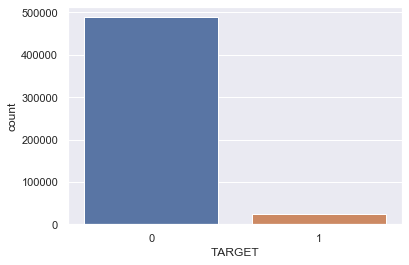

In percents: 
0    0.951
1    0.049
Name: TARGET, dtype: float64


In [26]:
print(df['TARGET'].value_counts())
sns.set(style='darkgrid')
sns.countplot(x = 'TARGET',
              data = df,
              order = df['TARGET'].value_counts().index)
plt.show()
print("In percents: ")
print(round(1. *df['TARGET'].value_counts() / len(df['TARGET']), 3))

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
y = df["TARGET"]
X = df.drop(labels=["TARGET"],axis = 1)

smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_sample(X, y)

In [29]:
from sklearn.preprocessing import MinMaxScaler
X = pd.DataFrame(MinMaxScaler().fit_transform(X))

In [30]:
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=42)

In [31]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=8, random_state=42)

rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [32]:
pred_test = rfc.predict(X_test)

Train:  0.8521712215935252
Test:  0.8498869368585841
              precision    recall  f1-score   support

           0       0.84      0.86      0.85     97518
           1       0.86      0.84      0.85     97948

    accuracy                           0.85    195466
   macro avg       0.85      0.85      0.85    195466
weighted avg       0.85      0.85      0.85    195466



array([[83878, 13640],
       [15702, 82246]], dtype=int64)

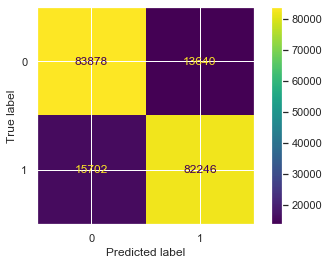

In [33]:
# creating a confusion matrix
cm = confusion_matrix(y_test, pred_test)
print("Train: ",rfc.score(X_train, y_train))
print("Test: ", rfc.score(X_test, y_test))
print(classification_report(y_test,  pred_test))
plot_confusion_matrix(rfc, X_test, y_test, values_format = '')
cm

In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, pred_test))
print("Precision:",metrics.precision_score(y_test, pred_test))
print("Recall:",metrics.recall_score(y_test, pred_test))
print("F1-score", metrics.f1_score(y_test, pred_test))

Accuracy: 0.8498869368585841
Precision: 0.8577477421104228
Recall: 0.8396904479928126
F1-score 0.8486230485879671


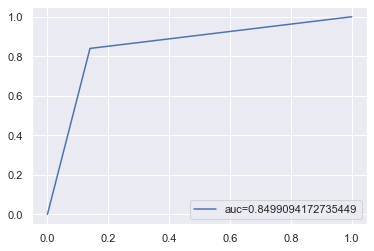

ROC-AUC: 0.8499094172735449


In [35]:
y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  pred_test)
auc = metrics.roc_auc_score(y_test, pred_test)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()
print('ROC-AUC:', auc) # 74 output

## DecisionTreeClassifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=7, random_state=42)

dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [37]:
pred_test = dtc.predict(X_test)

Train:  0.839739392017026
Test:  0.8376597464520684
              precision    recall  f1-score   support

           0       0.82      0.86      0.84     97518
           1       0.85      0.82      0.83     97948

    accuracy                           0.84    195466
   macro avg       0.84      0.84      0.84    195466
weighted avg       0.84      0.84      0.84    195466



array([[83505, 14013],
       [17719, 80229]], dtype=int64)

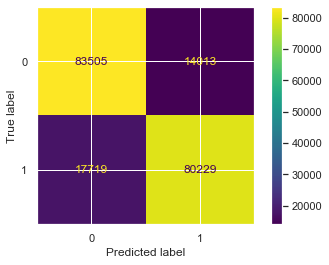

In [38]:
# creating a confusion matrix
cm = confusion_matrix(y_test, pred_test)
print("Train: ",dtc.score(X_train, y_train))
print("Test: ", dtc.score(X_test, y_test))
print(classification_report(y_test,  pred_test))
plot_confusion_matrix(dtc, X_test, y_test, values_format = '')
cm

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, pred_test))
print("Precision:",metrics.precision_score(y_test, pred_test))
print("Recall:",metrics.recall_score(y_test, pred_test))
print("F1-score", metrics.f1_score(y_test, pred_test))

Accuracy: 0.8376597464520684
Precision: 0.8513083338638824
Recall: 0.8190978886756238
F1-score 0.8348925542431969


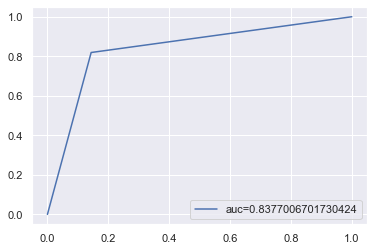

ROC-AUC: 0.8377006701730424


In [40]:
y_pred_proba = dtc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  pred_test)
auc = metrics.roc_auc_score(y_test, pred_test)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()
print('ROC-AUC:', auc)

In [41]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
cv = KFold(n_splits=3)
scv = StratifiedKFold(n_splits=3)
# Examine the positive label in train and test folds
print('KFold not Stratified')
for train_idx, test_idx in cv.split(y_sm):
    print(y_sm[train_idx].sum(), y_sm[test_idx].sum())

print('StratifiedKFold')
for train_idx, test_idx in scv.split(X_sm, y_sm):
    print(y_sm[train_idx].sum(), y_sm[test_idx].sum())

KFold not Stratified
472843 15822
341598 147067
162889 325776
StratifiedKFold
325777 162888
325776 162889
325777 162888


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import linear_model
# clf = GaussianNB()
# clf = linear_model.LogisticRegression()
# clf = RandomForestClassifier(n_estimators=5, random_state=42)
clf = DecisionTreeClassifier()
# clf = SVC(probability=True, random_state=42)
metric_names = ['f1', 'precision', 'recall', 'accuracy']
# metric_names = ['accuracy']

scores_df = pd.DataFrame(index=metric_names, columns=['Random', 'Stratified'])
for metric in metric_names:
    score1 = cross_val_score(clf, X_sm, y_sm, scoring=metric, cv=cv).mean()
    score2 = cross_val_score(clf, X_sm, y_sm, scoring=metric, cv=scv).mean()
    scores_df.loc[metric] = [score1, score2]
scores_df

,Random,Stratified
f1,0.723505,0.915125
precision,0.691418,0.895921
recall,0.870376,0.935375
accuracy,0.88219,0.913358
